# Deep Learning parte 1: Keras

## Classificação de roupas

Será acessado o dataset através do keras, esse dataset é composto por imagens de diversas roupas de diferentes tipos. 

Enquanto o modelo de Machine Learning aprende com as características que nomeamos, as funções de Deep Learning extraem essas características, pois entendem quais características são essas, como vimos no exemplo do vídeo. Lembrando que essa extração não precisa ser apenas para imagens ou problemas de classificação, podemos aplicar essa técnica para outros tipos de dados e problemas.

O **MNIST (site em inglês)** é um conjunto de imagens de números escritos à mão, e o seu nome significa literalmente que é um dataset Modificado do Instituto Nacional de Padrões e Tecnologia (em inglês Modified National Institute of Standards and Technology database). E por que modificado? Porque já havia um dataset chamado NIST (do Instituto Nacional de Padrões e Tecnologia) que tinha sido formado por imagens de números escritos à mão coletados de um escritório norte americano responsável pelo censo e também de estudantes do colegial.


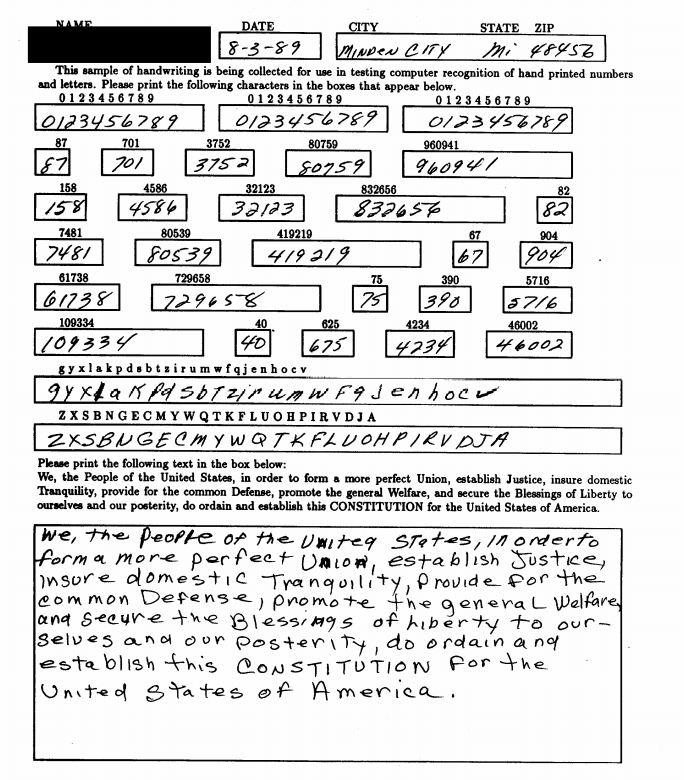

Então, agora sabemos que antes tinha o NIST, e depois o MNIST que modificou o NIST. Logo, o MNIST pegou as imagens de números no NIST, formatou essas imagens em 28x28 pixels e as deixou em escala de cinza. Ele possui 60.000 imagens para treino e 10.000 imagens para teste.

Após a criação do MNIST, ele acabou virando o padrão de uso para o aprendizado de máquina, e resultados próximos a uma identificação humana de dígitos foram atingidos com ele. O que tornou a tarefa de reconhecer dígitos mais fácil, tão fácil que entender esse dataset parou de ser algo desafiador para os modelos da época.

E aí foi necessário pensar numa solução. Você tem um dataset que está fácil demais de identificar? O que dá pra fazer? Colocar mais imagens? Colocar imagens diferentes? Essa foi uma das respostas. Aumentar esse dataset, fazendo uma extensão dele para dificultar o aprendizado de máquina.

E aí surgiu o EMNIST (arquivo em inglês), com E de extensão. E, do mesmo modo que o MNIST tinha herdado do NIST, o EMNIST herdou a “estrutura” do MNIST e adicionou letras aos números. Agora, tínhamos um dataset com números e letras.

Mas, ao começar a usar o dataset, as letras do EMNIST ainda ficavam muito próximas dos números, o que não foi o bastante para aumentar a complexidade da tarefa. As pessoas criando modelos e fazendo pesquisa ainda queriam algo mais desafiador. E agora? Uma resposta foi mudar o padrão original “alfa-numérico” e identificar imagens de roupas de uma loja alemã chamada Zalando (site em inglês), criando assim o Fashion MNIST (github em inglês).

Hoje em dia, o Fashion-MNIST é um dos datasets mais recomendados para uma introdução no estudo de Deep Learning. O que é um dos motivos para explorarmos esse dataset neste curso.

##Carregando o dataset

In [30]:
import pandas as pd
import numpy as np

In [1]:
import tensorflow
from tensorflow import keras

dados = keras.datasets.fashion_mnist

Visualisando os dados carregados, foi retornado um conjunto de arrays (essas tuplas são os dados de treino e teste).

In [2]:
dados.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
# Esse load está voltando um tupla que será salva nas variáveis abaixo
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dados.load_data()

In [4]:
# Vendo o array das imagens treino
imagens_treino

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

##Entendendo as imagens

In [5]:
len(imagens_treino)

60000

temos 60000 (sessenta mil) imagens de treino.Mas qual é a composição, o formato dessas imagens?

In [6]:
imagens_treino.shape

(60000, 28, 28)

possui 28 linhas e 28 colunas descrevendo as imagens.

In [7]:
imagens_teste.shape

(10000, 28, 28)

In [8]:
# Conferindo se as identificações batem com o número de imagens
print(len(identificacoes_treino))
print(len(identificacoes_teste))

60000
10000


###Visualizando as imagens

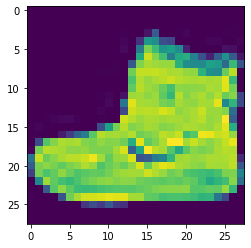

In [9]:
import matplotlib.pyplot as plt

plt.imshow(imagens_treino[0])

Conseguimos visualizar a primeira imagem dos dados de treino, como temos duas colunas de tamanho 28 temos essa imagem de 28 pixels, cada um trazendo a informação que gera a imagem.

##Exibindo as categorias

Text(0.5, 1.0, '9')

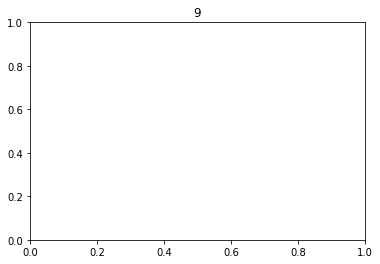

In [10]:
#Descobrindo o nome da primeira imagem dos dados de treino
plt.title(identificacoes_treino[0])

Descobrindo o nome da primeira imagem dos dados de treino, vemos que se chama "9". Vamos ver os nomes das identificações.

In [11]:
identificacoes_treino

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Existe um array de números para identificar as imagens. Vamos descobrir qual são essas números.

In [12]:
# Passando a função set do array para descobrir os valores únicos
set(identificacoes_treino)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Há um array de 10 posições pois o valor mínimo é 0 e o máximo 9.

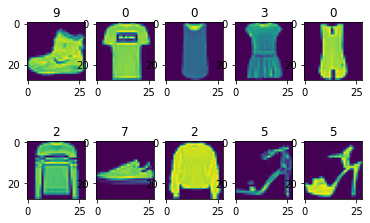

In [13]:
total_de_classificacoes = 10

for imagem in range(10):
  plt.subplot(2, 5, imagem + 1)
  plt.imshow(imagens_treino[imagem])
  plt.title(identificacoes_treino[imagem])

Foram exibidas 10 imagens, cada uma com seus labels de identificação.
Indo na documentação desse dataset, vemos que existe uma tabela com a descrição dos identificadores.

**Label**	**Description**
*  0	T-shirt/top
*  1	Trouser
*  2	Pullover
*  3	Dress
*  4	Coat
*  5	Sandal
*  6	Shirt
*  7	Sneaker
*  8	Bag
*  9	Ankle boot

(informações extraidas do github https://github.com/zalandoresearch/fashion-mnist)

In [14]:
nomes_de_classificacoes = ['Camiseta',
                           'Calça',
                           'Pullover',
                           'Vestido',
                           'Casaco',
                           'Sandália',
                           'Camisa',
                           'Tênis',
                           'Bolsa',
                           'Bota']

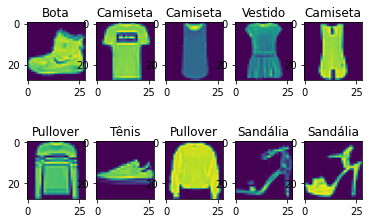

In [15]:
for imagem in range(10):
  # passada o numero de elementos por linha e coluna
  plt.subplot(2, 5, imagem + 1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

##Criando a camada 0

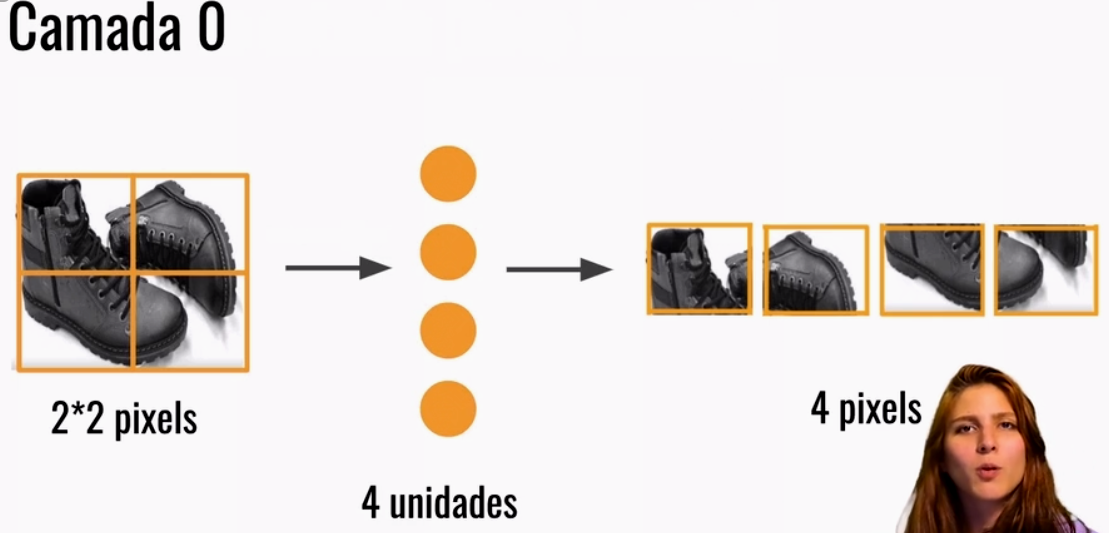

Temos um exemplo que são um par de botas, e se formos pegar esta imagem, ao usarmos len ou shape, vimos que ela tinha 28 x 28, linhas e colunas. E que cada um desses espaços ocupava um número, isso será chamado de pixel, então as imagens são formadas por pixels.

Se considerarmos 1px deste tamanho para esta imagem que vemos, conseguimos incluir 4px dentro dela, então dividimos esta imagem em 4px. Mas do mesmo modo que tínhamos 28 x 28, podemos ler esses 4px de outra forma, que são 2px para a nossa linha, e 2x para a coluna.

Repare que quando chamamos esta imagem de 2 x 2px, estamos tendo uma imagem de 2 dimensões, linhas e colunas. O que podemos fazer nesta primeira camada que chamamos de camada 0 é pegar esses 2 x 2px e, por exemplo, ter uma função para lidar com cada pixel. Então, teríamos 4 unidades, 1 para cada pixel, e o que elas farão é reordenar e reagrupar estes pixels. Então, em vez de termos 2 dimensões, 2 linhas e 2 colunas, teremos 1 linha e 4 colunas, assim temos 1 dimensão com 4 pixels.

É isso que faremos em nossa primeira camada, que é a que chamamos de camada 0. Essa é a nossa entrada. 

In [16]:
# Função sequencial de entrada, processamento e saída
# As camadas estão dentro da função
# input = são as dimensões de entrada
# Flatten() = ele "achata" os pixels (28x28), formando um array de 784 pixels.

# Criamos o modelo, com 1 camada sequencial
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28))

])

##Criando camada 1 

 A camada dense (densa) é aquela que faz as conexões entre todas as unidades da camada 2 com as unidades da camada 1 por exemplo.

In [17]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    # Preferencialmente um número multiplo de 2
    # Será adotada a função de redes neurais(nn), relu que é uma função do tensorflow
    # Relu = unidade linear retificada
    keras.layers.Dense(256, activation = tensorflow.nn.relu)
])

###Relu e não linearidade

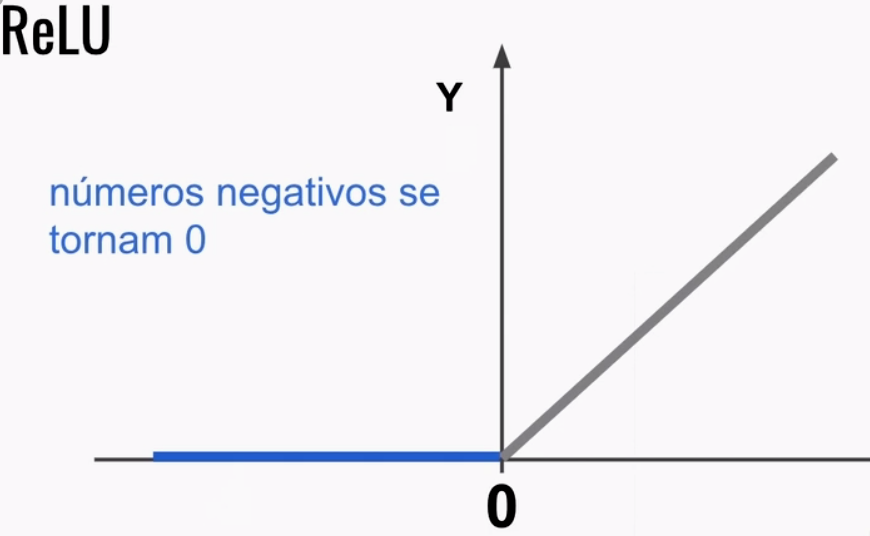

E números **positivos** se mantem positivos; a Relu introduz na rede neural ***funções não lineares***!!!!

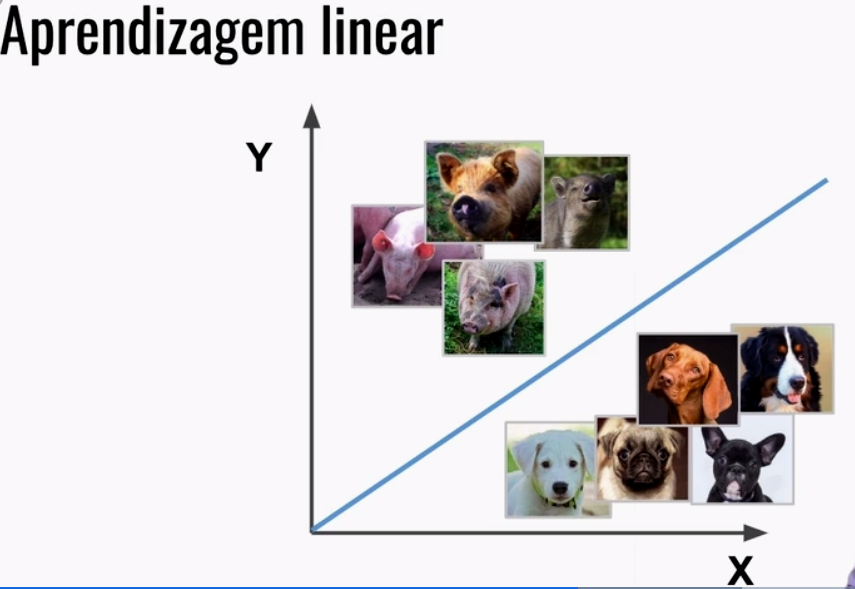

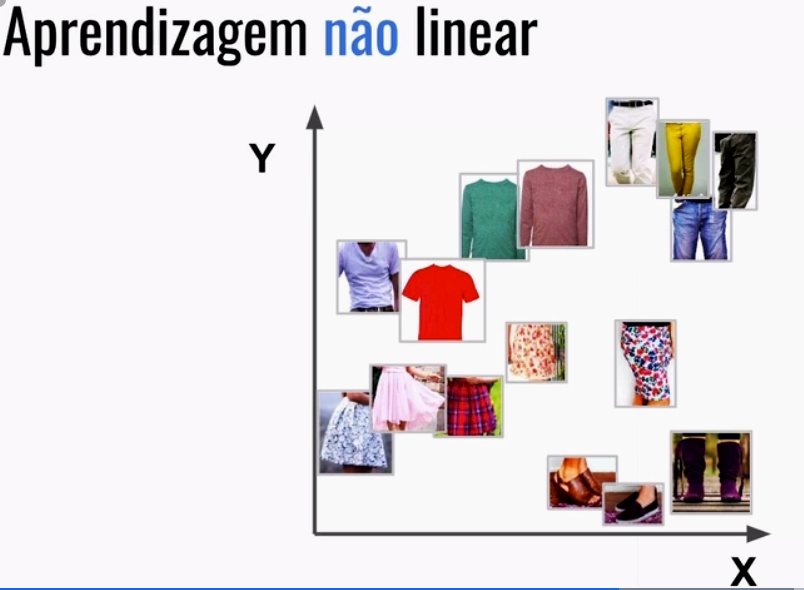

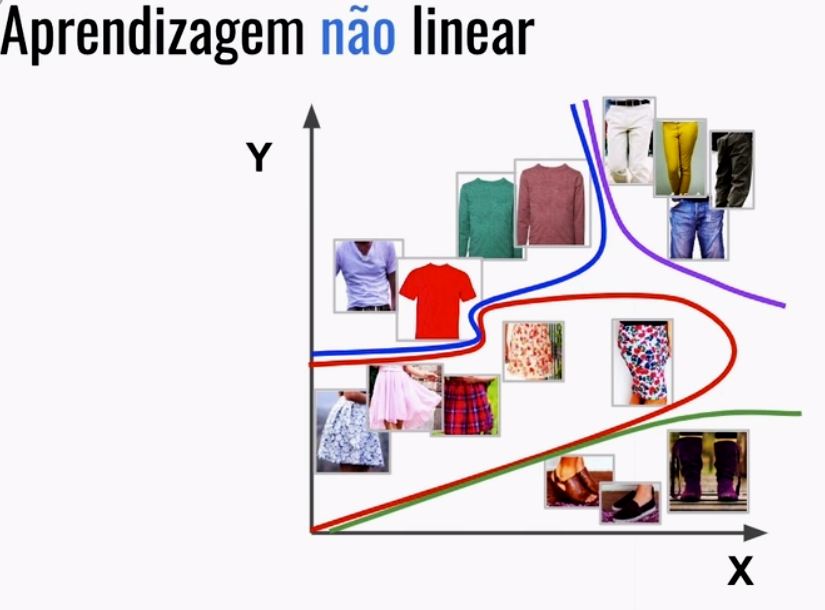

Por isso é utilizada a **Relu** porque não conseguimos uma relação linear com essas imagens; A função não linear introduz no modelo a transformação dos dados necessária para identificarmos as diferenças nas imagens que vamos classificar

##Camada de saída

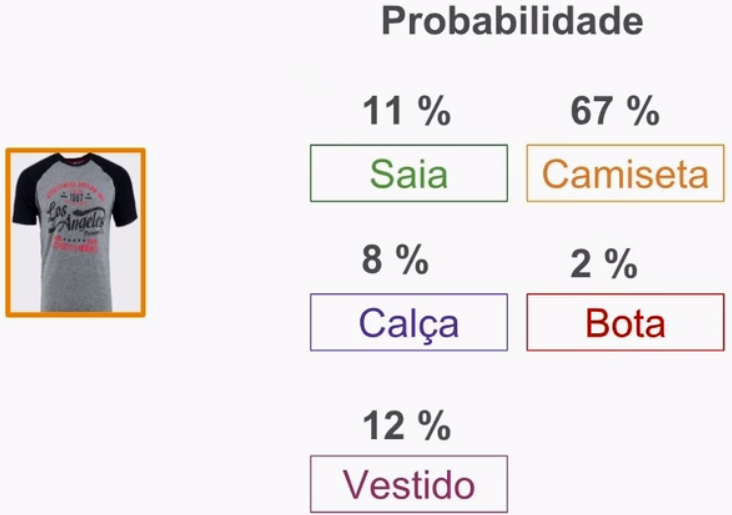

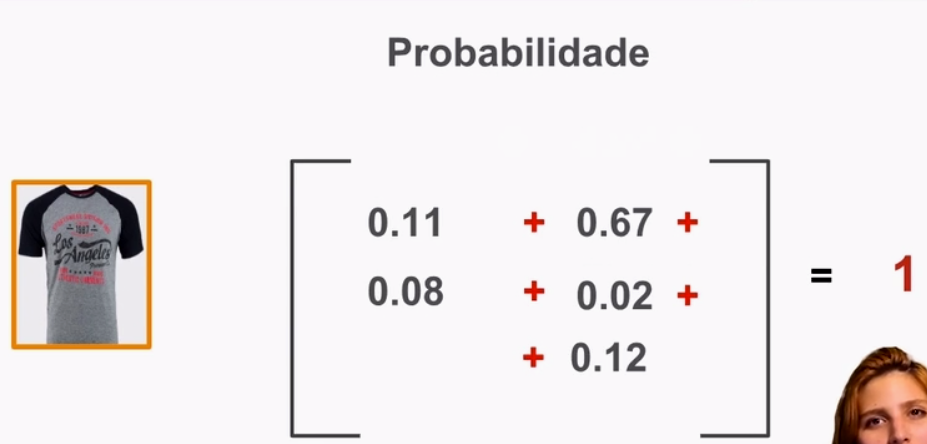

A função irá comparar as imagens com  as categorias, dar um percentual de que aquilo estará certo, agrupará tudo isso e todas as probabilidades somam 1; O nome dessa função é **Softmax**, como o maior valor é 0,67 essa categoria tem a maior probabilidade de estar certa.

In [18]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    # Preferencialmente um número multiplo de 2
    # Será adotada a função de redes neurais(nn), relu que é uma função do tensorflow
    # Relu = unidade linear retificada
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    # Saída = recebera 10 pois temos 10 categorias
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)
])

Dessa maneira, contamos que o modelo tem 2 camadas, exite discussão sobre multicamadas e camadas profundas.

##Treinando o modelo

Antes de treinar o modelo deve ser **compilado**!

### Argumentos do compile e treino do modelo

O otimizador é optimizer, e perda é loss, então o próprio erro já está dizendo para nós o que precisamos passar para o compile.

Vamos voltar àquela linha de código, e dentro de modelo.compile passaremos um otimizador, o tal do optimizer. O que é isso? Quando treinamos, podemos deixar o treino melhor, e esse otimizador fará isso. Não entrarei em detalhes disso agora, para podermos rodar nosso treino com mais agilidade, mas esta é a função do otimizador.

Usaremos um bem famoso para esses casos em que precisamos categorizar com mais de 2 categorias as nossas imagens. No caso, temos 10 categorias, então o otimizador mais indicado é o chamado **adam**, que colocaremos entre aspas simples.

Também precisamos passar a nossa perda, ou loss. E o que é isso? Toda vez que passamos uma informação, como neste caso, uma parte que não necessariamente entenderemos 100%.

Então, em qualquer sistema teremos uma perda de informação. Do mesmo modo que vimos anteriormente, se classificarmos **camiseta** como **Saia**, há uma **probabilidade**, mas sabemos que o que estamos vendo é uma **classificação** **errada**, então, se nossa Rede fizer isso, ela **perdeu** 
**informações**. O que iremos usar para calcular essa perda?

Colocaremos um sinal de =, aspas simples, e usaremos **Entropia** **Cruzada** **Categórica** **Esparsa**. Quer dizer que trata-se de um cálculo deste erro, a entropia, por categorias, haverá uma mistura, esse cruzada, e o esparsa por ser algo abrangente com várias categorias.

In [19]:
# Será usado optizer = adam e loss = 'entropia categoica cruzada esparsa'
modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy')

In [20]:
# Treinando o modelo
modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 10s 5ms/step - loss: 3.9394


Esse numero é quantidade de amostras = 60.000 dividido pelo numero **batch_size** que por padrão é **32**, então temos o 1875 que você está vendo.

##Escala de cinza e normalização

Vamos tentar diminuir aquela perda de 3,4944 para um número mais próximo de 0. Primeiramente veremos nossa camada de entrada, os pixels tem bastante informação, vamos ver suas informações.

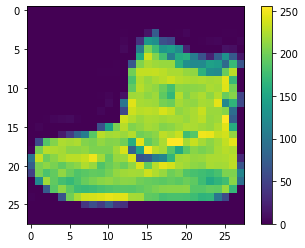

In [21]:
# Vendo a gradação das cores que possuem as imagens
# Ela varia de 0 até um pouco mais de 250
plt.imshow(imagens_treino[0])
plt.colorbar()

Quando a jogamos em nossa rede, estamos jogando algo que tem 28 por 28 posições, sendo que cada um dos valores que preenchem essa matriz de 28 linhas por 28 colunas está variando de 0 a 255.É uma variação bem grande, assim como nossa perda. Sendo assim, poderíamos tentar reduzir este número; se variar de 0 a 1, melhor, não é? Se eu te disser para me dizer um número de 0 a 200, você vai pensar por mais tempo do que se se pedir um número de 0 a 1.

Mas de que forma faremos, se deixarmos 0 e 1, para capturar essa gradação, essa diferença de cores? Porque ela é importante para identificarmos as imagens.

In [22]:
# Deixando na escala de 0 a 1 de ponto flutuante, vamos dividir pela gradação
# Normalização
imagens_treino = imagens_treino / 255.0

In [23]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    # Preferencialmente um número multiplo de 2
    # Será adotada a função de redes neurais(nn), relu que é uma função do tensorflow
    # Relu = unidade linear retificada
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    # Saída = recebera 10 pois temos 10 categorias
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)
])

# Será usado optizer = adam e loss = 'entropia categoica cruzada esparsa'
modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy')

# Treinando o modelo
modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 12s 6ms/step - loss: 0.4837


A perda diminuiu significadamente, foi de **4,944** para **0.4837**.

Diminuir a abrangencia numérica que a rede tem que processar ajuda muito na quantidade de informação que a gente perde.

##Definindo número de camadas

Criando camadas intermediárias "para funilar".

In [24]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    # Preferencialmente um número multiplo de 2
    # Será adotada a função de redes neurais(nn), relu que é uma função do tensorflow
    # Relu = unidade linear retificada
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    keras.layers.Dense(64, activation=tensorflow.nn.relu),
    # Saída = recebera 10 pois temos 10 categorias
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)
])

# Será usado optizer = adam e loss = 'entropia categoica cruzada esparsa'
modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy')

# Treinando o modelo
modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4879


Sabemos, então, que incluir camadas a mais em nossa rede, nesse momento, não está nos ajudando a diminuir a perda. Podemos experimentar mais, ou menos, vai depender do tanto que temos para poder fazer com as nossas camadas, com o tempo disponível para este desenvolvimento, etc.

O que podemos fazer, do que experimentamos até agora, é concluir que quando deixamos o modelo com apenas uma camada de ReLU com 256 unidades, ele acaba funcionando de um jeito mais legal do que se adicionamos mais uma camada com 128, ou outra com 64.

##Runtime e acurácia de treino

Epoch foi rodada uma vez apenas. Então, estamos treinando o nosso modelo com os nossos dados apenas uma vez. Podíamos aumentar este treinamento para ver se a perda diminui, e nosso modelo começa a entender mais informações.

Como sabemos o quanto estamos ganhando? porque sabemos até então que estamos perdendo menos; Para isso passamos a **metrics = [accuracy]**

In [45]:
# Voltaremos ao modelo com 1 camada
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    # Preferencialmente um número multiplo de 2
    # Será adotada a função de redes neurais(nn), relu que é uma função do tensorflow
    # Relu = unidade linear retificada
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    # Saída = recebera 10 pois temos 10 categorias
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)
])

# Será usado optizer = adam e loss = 'entropia categoica cruzada esparsa'
modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

# Treinando o modelo
historico = modelo.fit(imagens_treino, identificacoes_treino,
            epochs = 5,
            validation_split = 0.20)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4997 - accuracy: 0.8239 - val_loss: 0.3932 - val_accuracy: 0.8599
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3734 - accuracy: 0.8646 - val_loss: 0.3612 - val_accuracy: 0.8687
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3337 - accuracy: 0.8776 - val_loss: 0.3529 - val_accuracy: 0.8734
Epoch 4/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3102 - accuracy: 0.8852 - val_loss: 0.3428 - val_accuracy: 0.8735
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2925 - accuracy: 0.8915 - val_loss: 0.3275 - val_accuracy: 0.8814


In [46]:
historico

Ele retorna a accuracy por epoca, a perda por epoca, acuracia de validação e perda de validação

In [48]:
historico.history

{'loss': [0.4997495412826538,
  0.37344464659690857,
  0.33372044563293457,
  0.3102056384086609,
  0.29246050119400024],
 'accuracy': [0.8238541483879089,
  0.8646041750907898,
  0.8775625228881836,
  0.8852083086967468,
  0.8914791941642761],
 'val_loss': [0.393199622631073,
  0.36118000745773315,
  0.35293978452682495,
  0.3428112268447876,
  0.3274717926979065],
 'val_accuracy': [0.8599166870117188,
  0.8686666488647461,
  0.8734166622161865,
  0.8734999895095825,
  0.8814166784286499]}

In [50]:
historico.history['accuracy']

[0.8238541483879089,
 0.8646041750907898,
 0.8775625228881836,
 0.8852083086967468,
 0.8914791941642761]

Depois de treinar o modelo **5 vezes** conseguimos diminuir a perda para **0,2851** ! (resultados antes do validation_slit).

##Testando o modelo

In [28]:
testes = modelo.predict(imagens_teste)

In [29]:
testes[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Ele retornou um array com 9 zeros seguidos do número 1, ou seja, devemos pegar o maior número e verificar sua posição, essa imagem pertence a categoria 10 (uma bota).
Usaremos uma função do numpy chamada **argmax()** que é o maior argumento.

In [36]:
print('Resultdo do teste:', np.argmax(testes[0]))
print('Número da imagem de teste: {}'.format(identificacoes_teste[0]))

Resultdo do teste: 9
Número da imagem de teste: 9


Ele retornou a posição **9**, como vimos, é uma bota.

In [37]:
# Vendo o segundo elemento
print('Resultdo do teste:', np.argmax(testes[1]))
print('Número da imagem de teste: {}'.format(identificacoes_teste[1]))

Resultdo do teste: 2
Número da imagem de teste: 2


A rede também acertou.

##Avaliação e validação do modelo

Vimos que nosso modelo acertou, mas também errou. Como é que saberemos quantas vezes ele acertou ou errou, o quanto ele teve de acurácia ou perda. Existe uma forma de vermos isso em nosso teste; o Keras disponibiliza uma função para nós, de avaliação.

In [40]:
modelo.evaluate(imagens_teste, identificacoes_teste)

313/313 [==============================] - 2s 4ms/step - loss: 52.6807 - accuracy: 0.8711


[52.68073654174805, 0.8711000084877014]

Foi retornado um array com dois números, a primeira posição é a perda do teste e o segundo é a acurrácia do teste.

In [43]:
perda_teste, acurracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('A perda do teste é de: ', perda_teste)
print('A acurácia do teste é de: ', acurracia_teste)

313/313 [==============================] - 1s 4ms/step - loss: 52.6807 - accuracy: 0.8711
A perda do teste é de:  52.68073654174805
A acurácia do teste é de:  0.8711000084877014


##Gráfico de acurácia

Plot da acurácia de treino e acurácia da validação

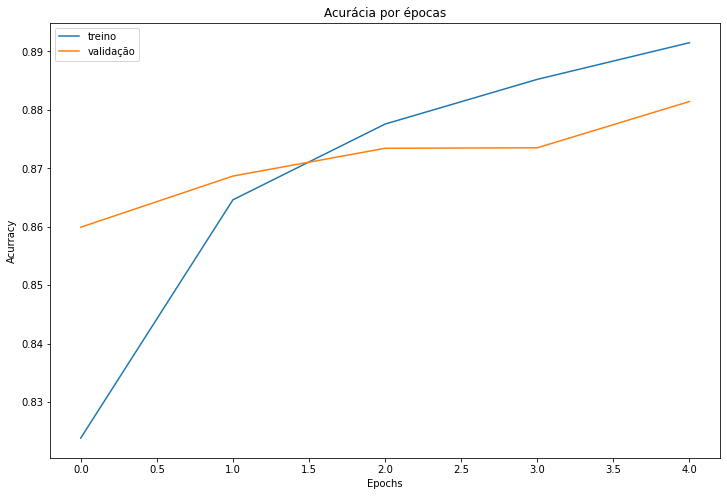

In [70]:
plt.figure(figsize = (12,8))
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title ('Acurácia por épocas')
plt.xlabel('Epochs')
plt.ylabel('Acurracy')
plt.legend(['treino', 'validação'])

##Under e overfitting

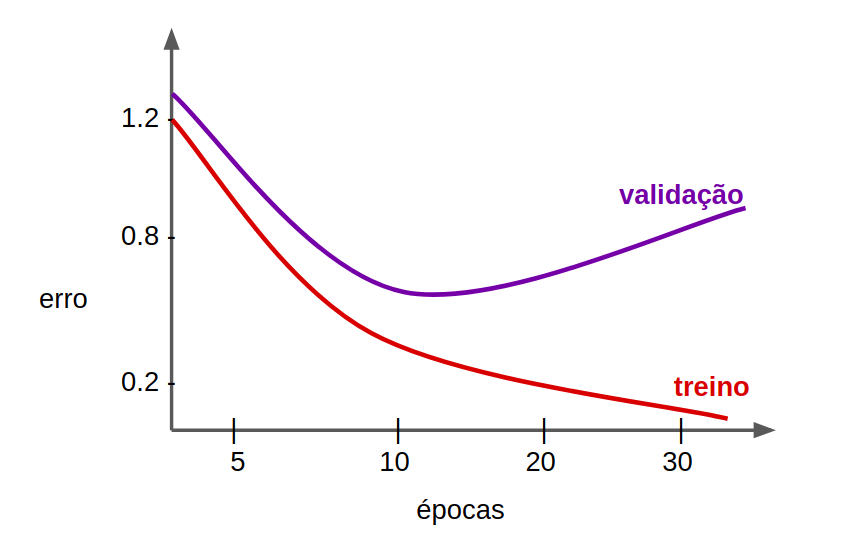

A imagem acima é um exemplo de **overffiting**, os dados se ajustam bem ao dados de treino mas começa a ir mal nos dados de validação.

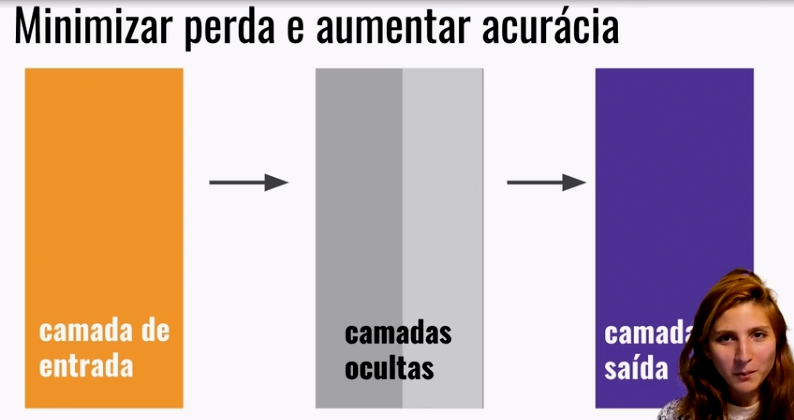

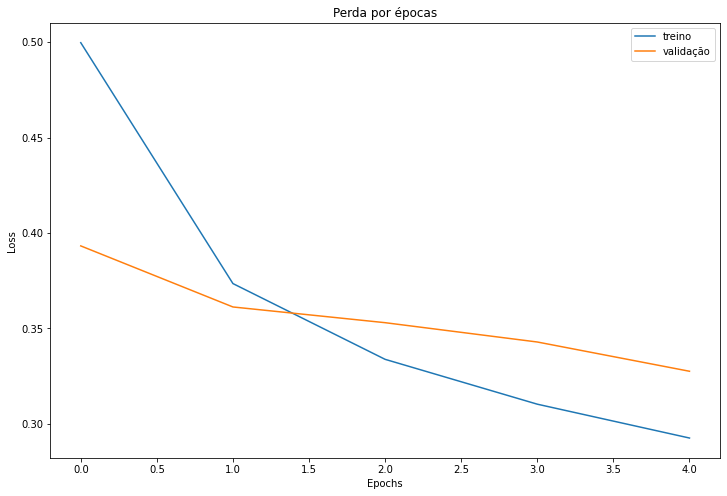

In [73]:
plt.figure(figsize = (12,8))
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title ('Perda por épocas')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['treino', 'validação'])

Alternado o número de épocas

In [75]:
# Voltaremos ao modelo com 1 camada
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    # Preferencialmente um número multiplo de 2
    # Será adotada a função de redes neurais(nn), relu que é uma função do tensorflow
    # Relu = unidade linear retificada
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    # Saída = recebera 10 pois temos 10 categorias
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)
])

# Será usado optizer = adam e loss = 'entropia categoica cruzada esparsa'
modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

# Treinando o modelo
historico = modelo.fit(imagens_treino, identificacoes_treino,
            epochs = 10,
            validation_split = 0.20)

Epoch 1/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5063 - accuracy: 0.8216 - val_loss: 0.4112 - val_accuracy: 0.8526
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3791 - accuracy: 0.8618 - val_loss: 0.3722 - val_accuracy: 0.8649
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3372 - accuracy: 0.8754 - val_loss: 0.3729 - val_accuracy: 0.8641
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3096 - accuracy: 0.8865 - val_loss: 0.3840 - val_accuracy: 0.8572
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2924 - accuracy: 0.8914 - val_loss: 0.3391 - val_accuracy: 0.8767
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2766 - accuracy: 0.8967 - val_loss: 0.3315 - val_accuracy: 0.8813
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2620 - accuracy: 0.9021 - val_loss: 0.3083 - val_accuracy:

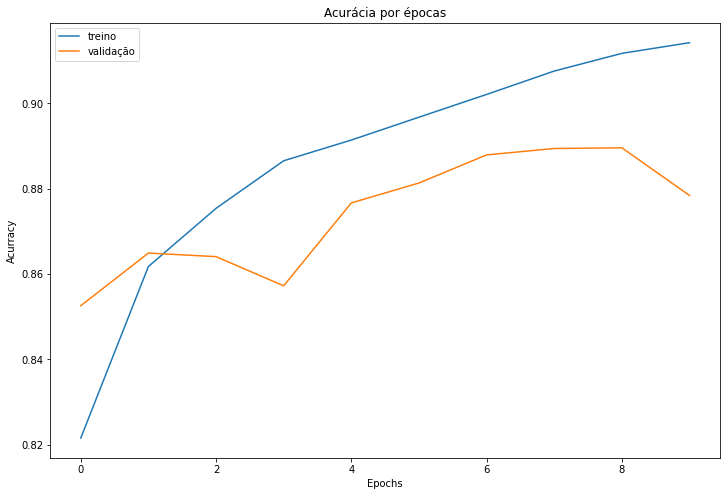

In [76]:
plt.figure(figsize = (12,8))
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title ('Acurácia por épocas')
plt.xlabel('Epochs')
plt.ylabel('Acurracy')
plt.legend(['treino', 'validação'])

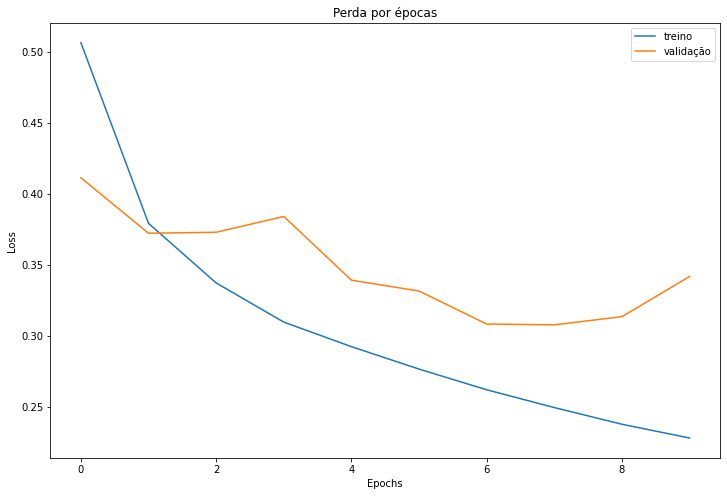

In [77]:
plt.figure(figsize = (12,8))
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title ('Perda por épocas')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['treino', 'validação'])

O modelo está prevendo muito bem os dados de treino e está piorando os dados de validação, estamos diante de **overfitting**.

Com base nos gráficos, vamos testar para **5 épocas**.

In [81]:
# Voltaremos ao modelo com 1 camada
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    # Preferencialmente um número multiplo de 2
    # Será adotada a função de redes neurais(nn), relu que é uma função do tensorflow
    # Relu = unidade linear retificada
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    # Saída = recebera 10 pois temos 10 categorias
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)
])

# Será usado optizer = adam e loss = 'entropia categoica cruzada esparsa'
modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

# Treinando o modelo
historico = modelo.fit(imagens_treino, identificacoes_treino,
            epochs = 5,
            validation_split = 0.20)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5017 - accuracy: 0.8217 - val_loss: 0.4035 - val_accuracy: 0.8586
Epoch 2/5
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3771 - accuracy: 0.8638 - val_loss: 0.3822 - val_accuracy: 0.8606
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3367 - accuracy: 0.8760 - val_loss: 0.3434 - val_accuracy: 0.8763
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3095 - accuracy: 0.8859 - val_loss: 0.3678 - val_accuracy: 0.8676
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2909 - accuracy: 0.8921 - val_loss: 0.3225 - val_accuracy: 0.8841


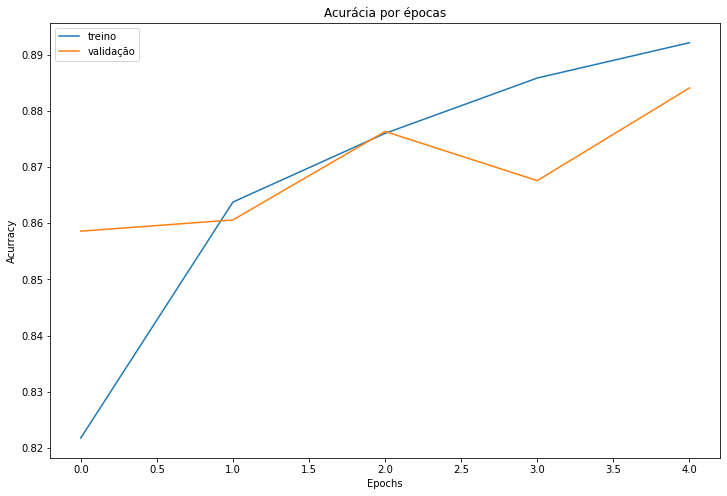

In [82]:
plt.figure(figsize = (12,8))
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title ('Acurácia por épocas')
plt.xlabel('Epochs')
plt.ylabel('Acurracy')
plt.legend(['treino', 'validação'])

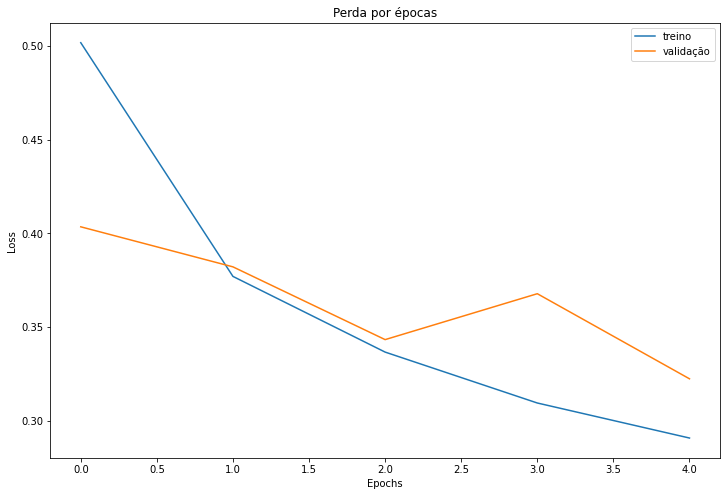

In [83]:
plt.figure(figsize = (12,8))
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title ('Perda por épocas')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['treino', 'validação'])

Tentaremos mexer nas camadas do modelo, adicionando uma camada **Dropout**.

In [87]:
# Voltaremos ao modelo com 1 camada
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    # Preferencialmente um número multiplo de 2
    # Será adotada a função de redes neurais(nn), relu que é uma função do tensorflow
    # Relu = unidade linear retificada
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    # Deixando adormecida algumas unidades, deixaremos 20%
    # Essa camada é como se fosse um tipo de normalização tbm.
    keras.layers.Dropout(0.20),
    # Saída = recebera 10 pois temos 10 categorias
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)
])

# Será usado optizer = adam e loss = 'entropia categoica cruzada esparsa'
modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

# Treinando o modelo
historico = modelo.fit(imagens_treino, identificacoes_treino,
            epochs = 4,
            validation_split = 0.20)

Epoch 1/4
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5294 - accuracy: 0.8128 - val_loss: 0.4212 - val_accuracy: 0.8449
Epoch 2/4
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3992 - accuracy: 0.8567 - val_loss: 0.3923 - val_accuracy: 0.8573
Epoch 3/4
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3629 - accuracy: 0.8670 - val_loss: 0.3473 - val_accuracy: 0.8733
Epoch 4/4
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3420 - accuracy: 0.8729 - val_loss: 0.3386 - val_accuracy: 0.8767


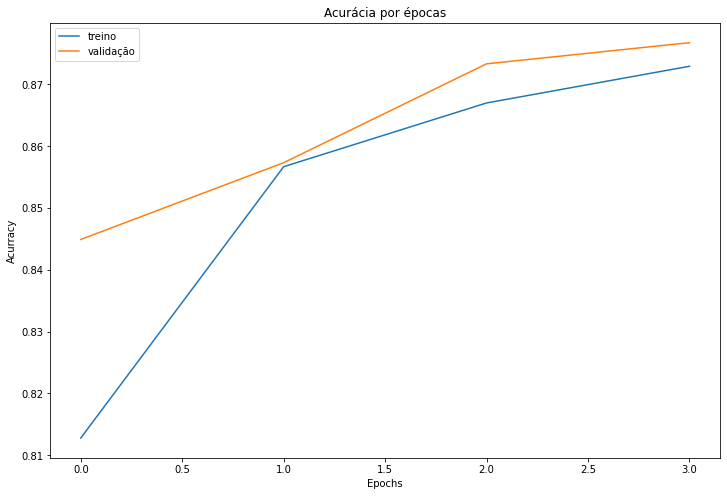

In [88]:
plt.figure(figsize = (12,8))
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title ('Acurácia por épocas')
plt.xlabel('Epochs')
plt.ylabel('Acurracy')
plt.legend(['treino', 'validação'])

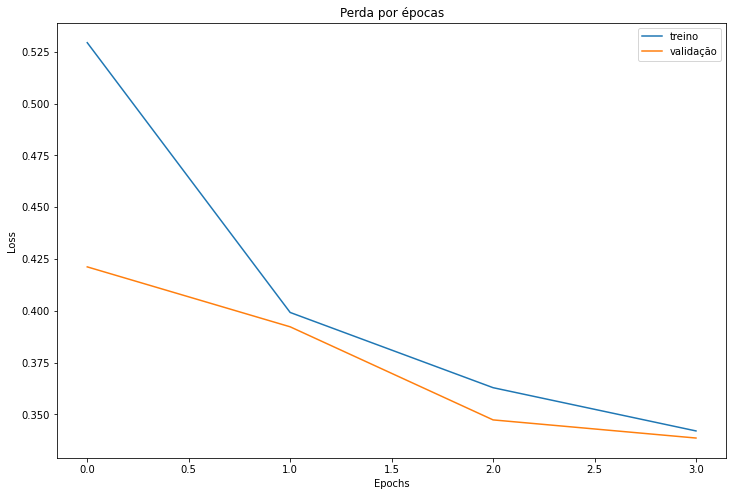

In [89]:
plt.figure(figsize = (12,8))
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title ('Perda por épocas')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['treino', 'validação'])

Agora sim, a validação se saiu melhor que os dados de teste.

##Salvando e caregando o modelo

In [92]:
from tensorflow.keras.models import load_model

modelo.save('modelo.h5')

In [93]:
modelo_salvo = load_model('modelo.h5')

Vamos fazer um predict com o modelo salvo.

In [98]:
testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('Resultado teste modelo salvo: ', np.argmax(testes_modelo_salvo[1]))
print('Número da imagem de teste: {}'.format(identificacoes_teste[1]))

print('Resultado teste modelo salvo: ', np.argmax(testes_modelo_salvo[300]))
print('Número da imagem de teste: {}'.format(identificacoes_teste[300]))

Resultado teste modelo salvo:  2
Número da imagem de teste: 2
Resultado teste modelo salvo:  3
Número da imagem de teste: 3
